In [1]:
install.packages(c('ggplot2','pROC'))
library(ggplot2)
library(pROC)
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [2]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)

## Create simulated data

In [3]:
n1 <- 1000
n2 <- 1000
diabetic_hgba1c_mean <- 8

#diabetic patients, mean hemoglobin A1c=8.
x1 <- rnorm(n1, mean=diabetic_hgba1c_mean, sd=1)
y1 <- x1
noise <- rnorm(n1, mean=0, sd=1.4)
# y = developed foot ulcer. Half of the diabetic patients will develop foot ulcer.
y1 <- y1 + noise
y1 <- y1 > diabetic_hgba1c_mean

#non-diabetic patients, mean hemoglobin A1c=5.
x2 <- rnorm(n2,mean=5,sd=0.2)
y2 <- rep(F,n2) #None of the non-diabetic patients develop foot ulcer.


## Create a dataset with just diabetic patients

In [4]:
data <- data.frame(x=x1, y=y1)

## Plot distribution of biomarker values for patients with and without outcome

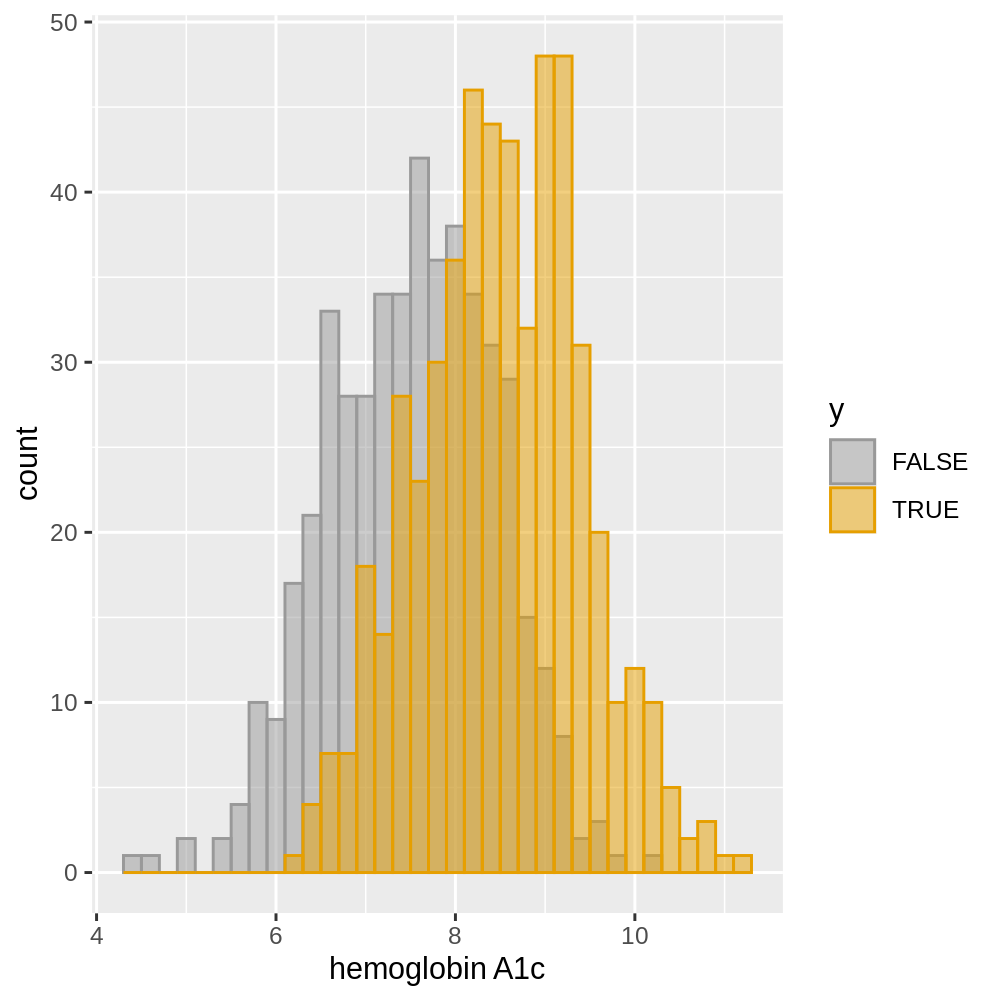

In [5]:
ggplot(data, aes(x, fill = y, color = y)) + 
  geom_histogram(alpha = 0.5, position = 'identity',binwidth=0.2)+
  xlab('hemoglobin A1c')+
  scale_color_manual(values=cbPalette[1:2])+
  scale_fill_manual(values=cbPalette[1:2])

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



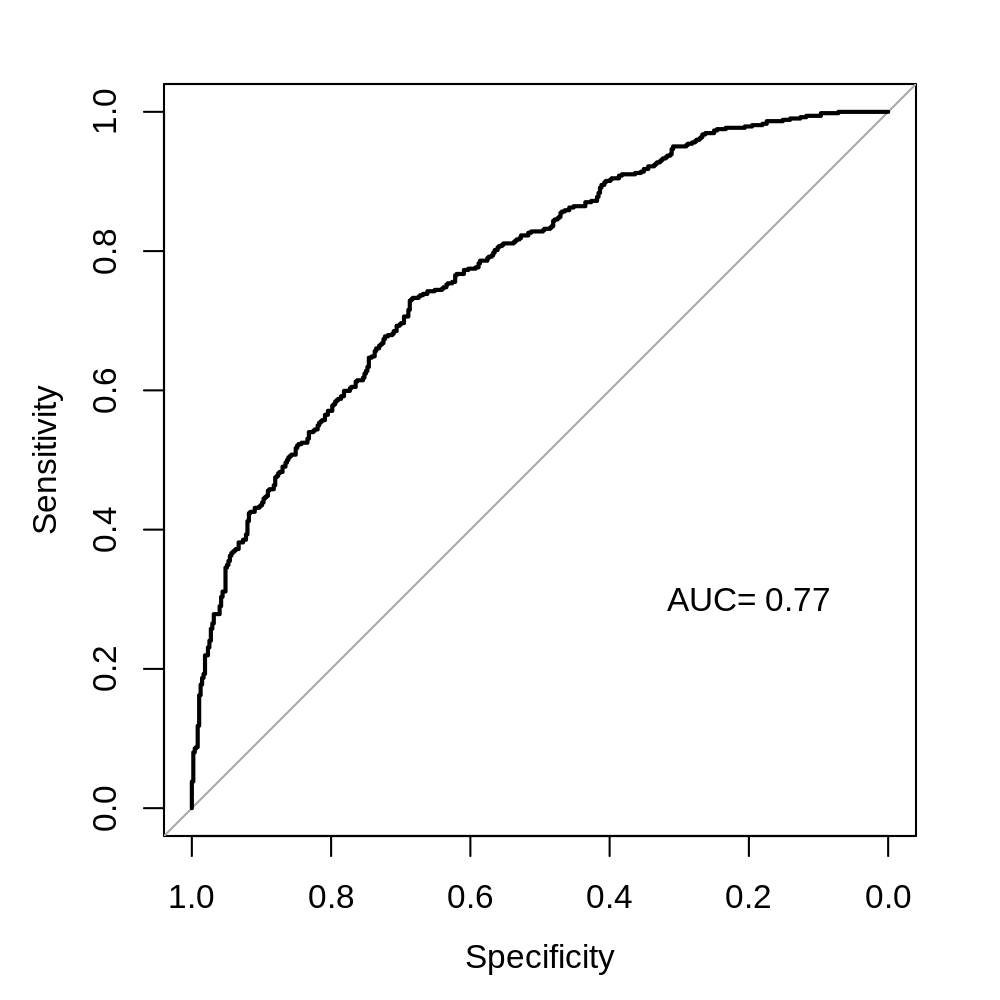

In [6]:
roc_obj <- roc(data$y, data$x)
plot(roc_obj)
text(0.2,0.3,paste('AUC=',format(auc(roc_obj),digits=2)))

## Create a dataset with mix of diabetics and non-diabetics

In [7]:
data <- data.frame(x=c(x1,x2), y=c(y1,y2))

## Plot distribution of biomarker values for patients with and without outcome

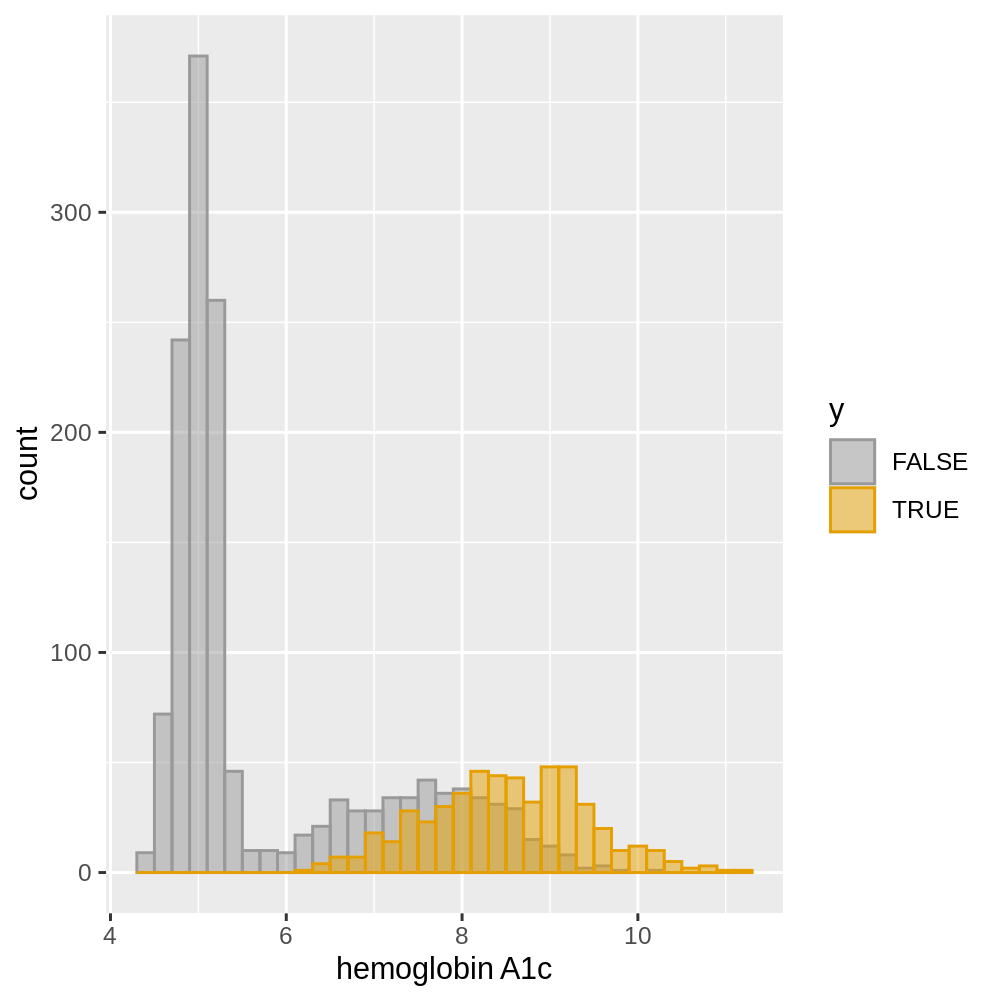

In [8]:
ggplot(data, aes(x, fill = y, color = y)) + 
  geom_histogram(alpha = 0.5, position = 'identity',binwidth=0.2)+
  xlab('hemoglobin A1c')+
  scale_color_manual(values=cbPalette[1:2])+
  scale_fill_manual(values=cbPalette[1:2])

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



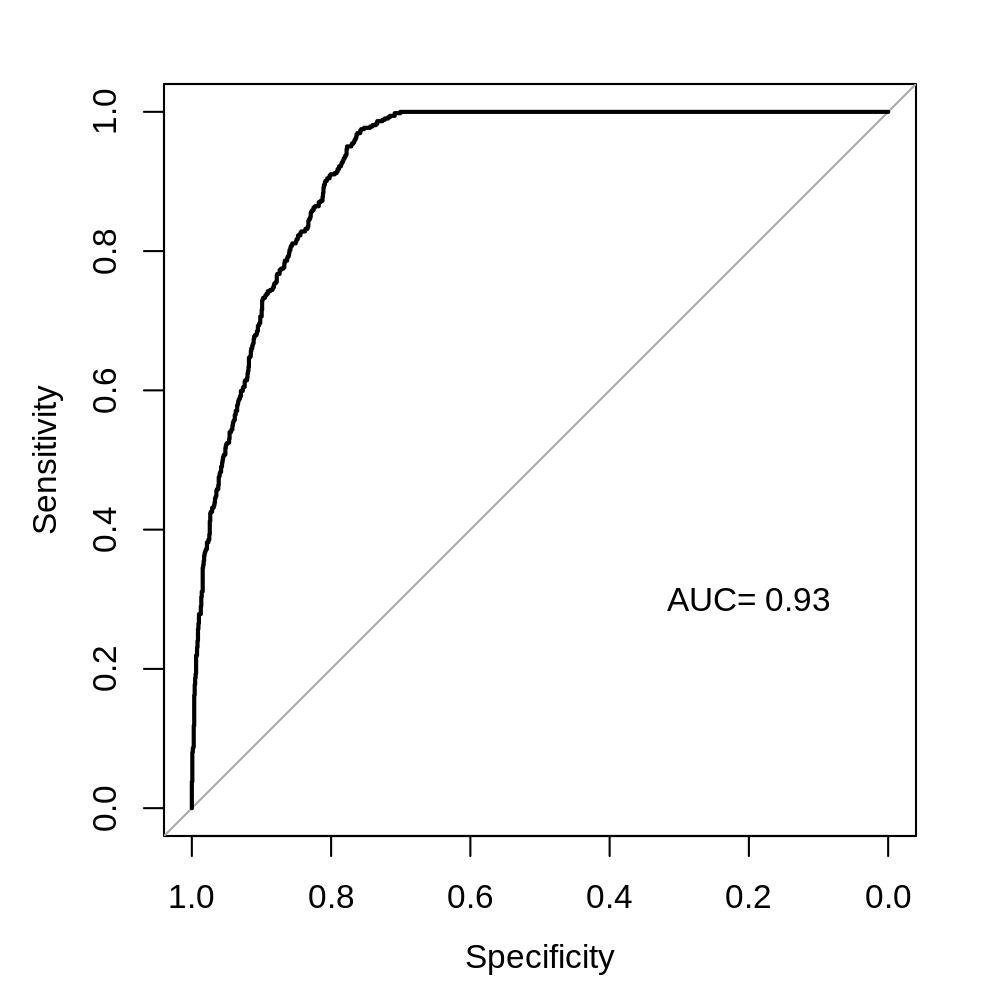

In [10]:
roc_obj <- roc(data$y, data$x)
plot(roc_obj)
text(0.2,0.3,paste('AUC=',format(auc(roc_obj),digits=2)))